In [1]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import eigvals, svd
import matplotlib.pyplot as plt
from qiskit.quantum_info import partial_trace

In [2]:
d = 5
k = 3
num = 10000 # размер выборки
av_num = 50 # число усреднениий

# 2
a = 2
b = 4

In [3]:
# Функции для генерации случайных состояний

# генерирует смешанное состояние
def gen_rho(d, k):
    c = 2*(np.random.randn(d*k)-0.5) + 2j*(np.random.randn(d*k)-0.5)
    c = c/((abs(c)**2).sum()**0.5)
    Psi = np.reshape(c, (d, k))
    Rho = Psi@np.conjugate(Psi.T)
    return Rho

# генерирует чистое состояние
def gen_psi(d, k):
    c = 2*(np.random.randn(d*k)-0.5) + 2j*(np.random.rand(d*k)-0.5)
    c = c/((abs(c)**2).sum()**0.5)
    return c

In [10]:
# Задание 1.1
gen_psi(3,3)

array([-0.0355341 +0.05655796j, -0.73048306+0.13898898j,
        0.1383227 -0.06285559j, -0.25441873+0.06434791j,
       -0.02858472-0.00948467j, -0.15775035-0.0312472j ,
       -0.21206018-0.06559529j, -0.36268882-0.0151689j ,
       -0.35999734+0.11510568j])

In [5]:
# Сгенерируем выборку матриц плотности и найдем собственные значения
Rhos = np.zeros(num, dtype=object)
e_vals = np.zeros((num, d))
for i in range(num):
    Rhos[i] = gen_rho(d, k)
    e_vals[i] = eigvals(Rhos[i])

<ipython-input-5-fb88737c9bba>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  e_vals[i] = eigvals(Rhos[i])


In [6]:
# Запихнем все собственные значения в один массив
e_vals_all = np.reshape(e_vals, num*d)

Text(0.5, 0, 'Собственное значение')

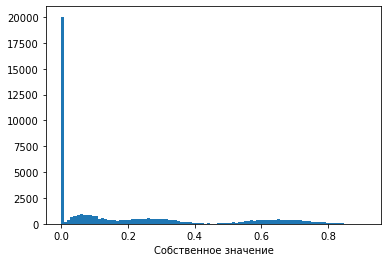

In [7]:
# Построим распределение собственных значений
plt.hist(e_vals_all, bins=100)
plt.xlabel('Собственное значение')

In [177]:
# Вычислим среднее Purity, изменяя k
k_max = 100
p = np.zeros(k_max)
for j in range(0, k_max):
    for i in range(av_num):
        r = gen_rho(d, j+1)
        p[j] += np.trace(r@r)/av_num

<ipython-input-177-d721280f08a4>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  p[j] += np.trace(r@r)/av_num


Text(0, 0.5, 'Среднее Purity')

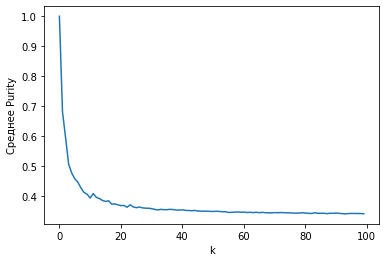

In [178]:
# Построим зависимость среднего Purity от k
plt.plot(p)
plt.xlabel('k')
plt.ylabel('Среднее Purity')

In [179]:
# Задание 1.2
# Далее рассматривается следующее состояние (система A - 1 кубит, B - 2 и 3 кубит):

$|\psi\rangle = \frac{\sqrt{2}}{6}|001\rangle+\frac{\sqrt{7}}{6}|011\rangle-\frac{\sqrt{5}}{6}|110\rangle+\frac{\sqrt{22}}{6}|100\rangle$

In [180]:
# Создадим его
psi = np.zeros(a*b)
psi[int('001', 2)] = 2**0.5/6
psi[int('011', 2)] = 7**0.5/6
psi[int('110', 2)] = -5**0.5/6
psi[int('100', 2)] = 22**0.5/6
Psi = np.reshape(psi, (a, b))

In [181]:
# Проведем SVD-разложение (эквивалентно разложению Шмидта)
u, s, vh = svd(Psi, full_matrices=False)
rho_A = u*s**2@np.conjugate(u).T
rho_B = np.conjugate(vh).T@np.diag(s**2)@vh

In [182]:
# Выведем матрицу плотности подсистемы A
print(rho_A)

[[0.25 0.  ]
 [0.   0.75]]


In [183]:
# Выведем матрицу плотности подсистемы B
print(np.round(rho_B, 3))

[[ 0.611 -0.    -0.291  0.   ]
 [-0.     0.056  0.     0.104]
 [-0.291  0.     0.139 -0.   ]
 [ 0.     0.104 -0.     0.194]]


In [184]:
# Теперь получим матрицы плотности через частичный след.
# Для этого выразим матрицу плотности всей системы
rho = np.outer(np.conjugate(psi), psi)

In [185]:
# Найдем матрицу плотности подсистемы A
# Посчитаем частичный след через numpy
print(np.round(np.trace(np.reshape(rho, [2,4,2,4]), axis1=1, axis2=3), 3))

[[0.25 0.  ]
 [0.   0.75]]


In [186]:
# Для проверки посчитаем частичный след через qiskit
np.round(partial_trace(rho, [0, 1]), 3)

array([[0.25+0.j, 0.  +0.j],
       [0.  +0.j, 0.75+0.j]])

In [187]:
# Найдем матрицу плотности подсистемы B
# Посчитаем частичный след через numpy
np.round(np.trace(np.reshape(rho, [2,4,2,4]), axis1=0, axis2=2), 3)

array([[ 0.611,  0.   , -0.291,  0.   ],
       [ 0.   ,  0.056,  0.   ,  0.104],
       [-0.291,  0.   ,  0.139,  0.   ],
       [ 0.   ,  0.104,  0.   ,  0.194]])

In [188]:
# Для проверки посчитаем частичный след через qiskit
np.round(partial_trace(rho, [2]), 3)

array([[ 0.611+0.j,  0.   +0.j, -0.291+0.j,  0.   +0.j],
       [ 0.   +0.j,  0.056+0.j,  0.   +0.j,  0.104+0.j],
       [-0.291+0.j,  0.   +0.j,  0.139+0.j,  0.   +0.j],
       [ 0.   +0.j,  0.104+0.j,  0.   +0.j,  0.194+0.j]])

In [189]:
# Посчитаем число Шмидта
K = 1/(s**4).sum()
print(K)

1.5999999999999988


In [190]:
# Посчитаем Negativity, выполнив частичное транспонирование по переменным A
rho_ = np.reshape(np.round(np.transpose(np.reshape(rho, [2,4,2,4]) , axes=(2,1,0,3)), 3), (8, 8))
Neg = np.round((np.trace(la.sqrtm(np.conjugate(rho_).T@rho_))-1)/2, 3)
print(Neg)

0.433


In [191]:
# Сгенерируем выборку четырехкубитных состояний и найдем их числа Шмидта и Negativity
K_rands = np.zeros(num)
Neg_rands = np.zeros(num)
for i in range(num):
    psi_rand = gen_psi(4, 4)
    Psi_rand = np.reshape(psi_rand, (4, 4))
    _, s_rand, _ = svd(Psi_rand, full_matrices=False)
    K_rands[i] = 1/(s_rand**4).sum()  
    
    rho_rand = np.outer(np.conjugate(psi_rand), psi_rand)
    rho_rand_ = np.reshape(np.round(np.transpose(np.reshape(rho_rand, [4,4,4,4]) , axes=(2,1,0,3)), 3), (16, 16))
    Neg_rands[i] = np.round((np.trace(la.sqrtm(np.conjugate(rho_rand_).T@rho_rand_))-1)/2, 3)

<ipython-input-191-a3d3caf8b81a>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  Neg_rands[i] = np.round((np.trace(la.sqrtm(np.conjugate(rho_rand_).T@rho_rand_))-1)/2, 3)


Text(0.5, 0, 'Числа Шмидта')

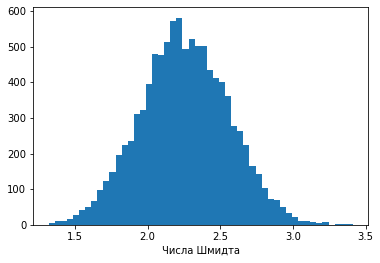

In [192]:
# Построим распределение чисел Шмидта.
# Видно, что распределение сильнее сконцентрировано в области большей запутанности
plt.hist(K_rands, bins=50)
plt.xlabel('Числа Шмидта')

Text(0.5, 0, 'Negativity')

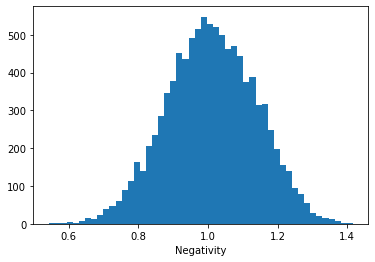

In [193]:
# Построим распределение чисел Шмидта.
# Видно, что распределение сильнее сконцентрировано в области большей запутанности
plt.hist(Neg_rands, bins=50)
plt.xlabel('Negativity')